# **Классификация текста с помощью трансформеров: сравнительный анализ с традиционными методами.**

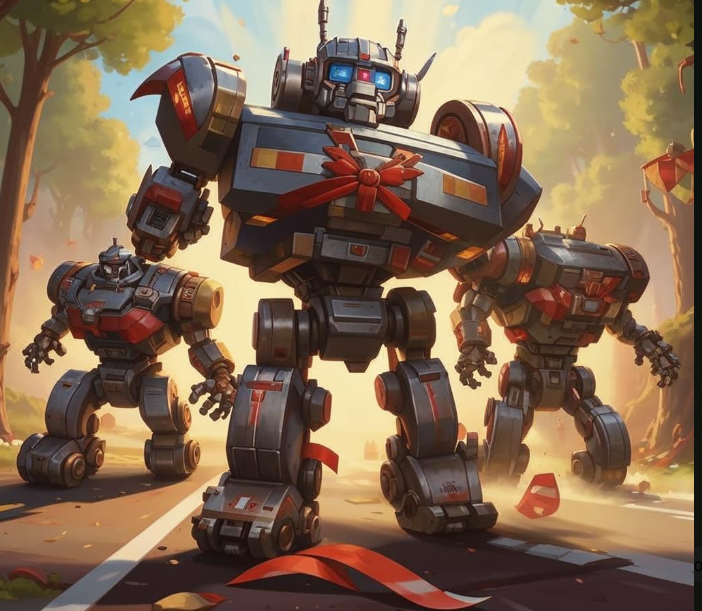

**Автор:** Гарбузова Татьяна Викторовна  
**Дата:** 2025 год

**Аннотация:**  
Данная работа исследует возможности современных трансформерных моделей, с акцентом на DistilBERT, в задаче бинарной классификации текстов, на примере отзывов IMDB (позитивные/негативные), в сравнении с производительностью традиционных алгоритмов машинного обучения, таких как случайный лес и логистическая регрессия. Исследование охватывает этапы предобработки данных, построение векторов признаков с использованием TF-IDF для традиционных подходов, обучение моделей и детальный анализ полученных метрик, таких как accuracy, precision, recall и F1-score. Особое внимание уделено преимуществам трансформеров в обработке текстовой информации, а также вопросам их оптимизации и применимости в решении задач анализа тональности.

**Краткое описание проблемы:**

Задача классификации текстовых отзывов является одной из типичных проблем машинного обучения с учителем (supervised learning), которая находит применение в реальных бизнес-задачах, таких как анализ отзывов клиентов, изучение пользовательских предпочтений и мониторинг репутации брендов. Основные сложности данной задачи включают:

- Высокую размерность текстовых данных, из-за чего сложно определить значимые признаки.
- Неоднозначность естественного языка, вызванную синонимией, многозначностью слов и контекстными зависимостями.
- Наличие «шума» (ошибки, опечатки, сарказм и т.д.), усложняющего обработку.

Для решения этих вопросов используются как классические подходы, применяющие статистические методы и инженерные методы выделения признаков, так и современные глубокие модели, использующие контекстное представление данных.

**Методология и основные концепции:**

**1. Классические подходы (TF-IDF + традиционные модели):**

- Предварительная обработка текста с построением числового векторного представления признаков через TF-IDF (term frequency-inverse document frequency).
- Использование логистической регрессии — простого и интерпретируемого метода классификации, который строит вероятностную модель:

P(y=1|x) = σ(w^T·x + b),
где σ — сигмоидная функция.

- Применение случайного леса, ансамблевой модели решающих деревьев, позволяющей улучшить качество классификации за счет разнообразия решений моделей.

**2. Современные трансформеры (DistilBERT):**

DistilBERT представляет собой упрощенную версию BERT (Bidirectional Encoder Representations from Transformers), оптимизированную по вычислительной сложности, но сохраняющую высокую производительность.

- Архитектура трансформеров базируется на механизме self-attention, который позволяет уловить контекстные взаимосвязи между словами в предложении:

Attention(Q, K, V) = softmax(Q·K^T / √d_k) · V.

В отличие от методов на основе RNN или CNN, трансформеры выполняют параллельную обработку текста, умеют захватывать глобальные зависимости и значительно ускоряют обучение.

**Основные шаги работы:**

- Предобработка данных: токенизация, очистка данных, векторизация текста.
- Обучение и оценка моделей: использование кросс-валидации для традиционных алгоритмов и fine-tuning DistilBERT для классификации.
- Анализ результатов на основе метрик качества для идентификации сильных и слабых сторон каждого подхода.

# Установка необходимых библиотек:

In [ ]:
!pip install transformers datasets scikit-learn matplotlib seaborn pandas tqdm evaluate

# Импорт установленных библиотек:

In [ ]:
# Основные библиотеки для работы с данными
import numpy as np  # Библиотека для работы с многомерными массивами, линейной алгеброй и численными вычислениями
import pandas as pd  # Библиотека для обработки табличных данных: создание, манипуляции, анализ

# Библиотеки для визуализации данных
import matplotlib.pyplot as plt  # Базовый инструмент для создания графиков и визуализации данных
import plotly.express as px  # Библиотека для интерактивной визуализации, удобна для динамических графиков
import seaborn as sns  # Дополнение к matplotlib для создания более сложных и стильных графиков

# Библиотеки для взаимодействия в Jupyter Notebook
from ipywidgets import interact  # Создание интерактивных виджетов для удобного изменения параметров/настроек в реальном времени
from IPython.display import clear_output  # Очищение вывода в Jupyter Notebook, полезно для интерактивных приложений

# Подготовка данных для обучения моделей машинного обучения
from sklearn.model_selection import train_test_split  # Разделение данных на обучающую и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer  # Преобразование текста в численные векторы (метод TF-IDF)

# Алгоритмы машинного обучения (ML) из библиотеки scikit-learn
from sklearn.linear_model import LogisticRegression  # Линейная модель логистической регрессии, часто используется для классификации
from sklearn.ensemble import RandomForestClassifier  # Модель случайного леса, подходящая для классификации и регрессии

# Метрики для оценки качества моделей
from sklearn.metrics import (
    accuracy_score,  # Метрика точности (доля правильных ответов)
    classification_report,  # Полный отчет по классификации (точность, полнота, F1-score по классам)
    confusion_matrix,  # Матрица ошибок (показывает, сколько объектов верно/неверно классифицировано)
    roc_curve, auc,  # ROC-кривая и площадь под ней (AUC) для оценки моделей классификации
    precision_score,  # Точность (precision) классификации
    recall_score,  # Полнота (recall) классификации
    f1_score  # F1-мера: гармоническое среднее между точностью и полнотой
)

# Импорт трансформеров для работы с моделями глубокого обучения
from transformers import (
    AutoTokenizer,  # Токенизатор для моделей трансформеров
    AutoModelForSequenceClassification,  # Модель для задач классификации текста
    Trainer, TrainingArguments, TrainerCallback  # Утилиты для настройки и обучения моделей
)

# Библиотека для работы с вычислениями на GPU (используется в глубоких нейронных сетях)
import torch  # Популярная библиотека для глубокого обучения на основе тензоров и автодифференцирования

# Работа с NLP-данными
from datasets import load_dataset, Dataset  # Загрузка готовых наборов данных или создание собственных
from tqdm.auto import tqdm  # Прогресс-бары для красивого отображения выполнения цикла

# Подключение Google Drive
from google.colab import drive

# Дополнительные утилиты
import re  # Работа с регулярными выражениями (поиск и замена текста)
import random  # Работа с генерацией случайных чисел
import evaluate  # Набор инструментов для оценки моделей

# Конфигурация

In [ ]:
# Устанавливаем фиксированное зерно для генератора случайных чисел в Python,
# чтобы результаты экспериментов были воспроизводимыми.
random.seed(42)

# Устанавливаем фиксированное зерно для генератора случайных чисел в PyTorch,
# чтобы обеспечить воспроизводимость всех операций, зависящих от случайных чисел.
torch.manual_seed(42)

# Устанавливаем фиксированное зерно для всех генераторов случайных чисел на устройствах CUDA в PyTorch,
# что помогает обеспечить воспроизводимость при использовании GPU.
torch.cuda.manual_seed_all(42)

# Устанавливаем стиль для визуализаций в seaborn.
# Стиль "whitegrid" создает белый фон с сеткой, что делает графики более читаемыми.
sns.set(style="whitegrid")

# Подключение Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Анализ и подготовка данных:

1. Загрузка датасета IMDb reviews:

In [ ]:
# Загружаем датасет с отзывами о фильмах IMDB, используя библиотеку `datasets`.
# Это предопределенный набор данных с метками (положительный или отрицательный отзыв).
dataset = load_dataset("imdb")

# Извлекаем тренировочную часть датасета, содержащую данные для обучения модели.
train_data = dataset["train"]

# Извлекаем тестовую часть датасета, содержащую данные для оценки качества модели.
test_data = dataset["test"]

In [ ]:
# Пример данных
print("Пример текста:", train_data[0]["text"][:200], "...")
print("Класс:", train_data[0]["label"])

Пример текста: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev ...
Класс: 0


2. Визуализация распределения длины текстов (до очистки)

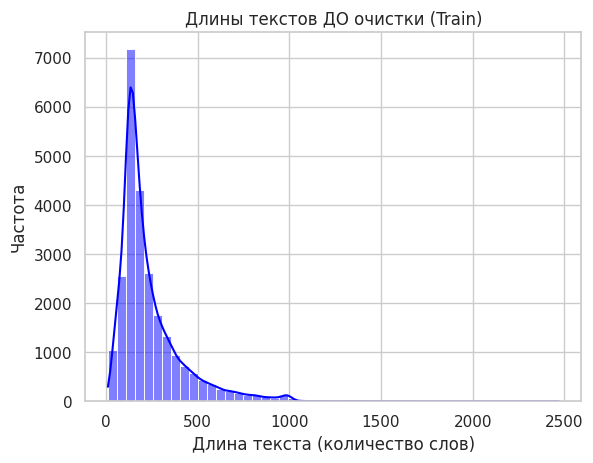

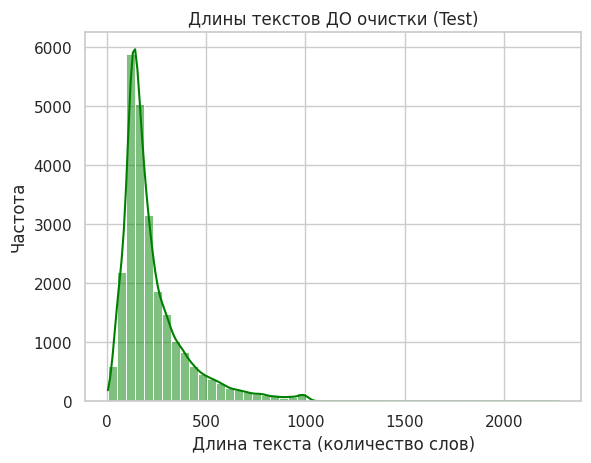

In [ ]:
def plot_text_length_distribution(dataset, title, color, bins=50):
    """Определяем функцию для построения распределения длины текстов в датасете.
       Эта функция визуализирует, сколько слов содержат тексты в выборке."""
    # Вычисляем длину каждого текста в выборке, измеряемую количеством слов.
    lengths = [len(text.split()) for text in dataset["text"]]

    # Создаем гистограмму распределения длины текстов с помощью seaborn.
    # Параметр `bins` задает количество столбцов в гистограмме,
    # а `kde=True` добавляет сглаженную плотность распределения.
    sns.histplot(lengths, bins=bins, kde=True, color=color)

    # Указываем заголовок для графика.
    plt.title(title)

    # Подписываем ось X, обозначая, что она представляет длину текстов в словах.
    plt.xlabel("Длина текста (количество слов)")

    # Подписываем ось Y, обозначая, что она представляет частоту (количество текстов данной длины).
    plt.ylabel("Частота")

    # Показываем график на экране.
    plt.show()


plot_text_length_distribution(train_data,
                              "Длины текстов ДО очистки (Train)",
                              color="blue")

plot_text_length_distribution(test_data,
                              "Длины текстов ДО очистки (Test)",
                              color="green")

3. Проверка на пропущенные значения:

In [ ]:
def check_missing_values(dataset):
    """Определяем функцию для проверки пропущенных значений в текстовом датасете.
       Пропущенными считаются записи, в которых текст либо отсутствует (None),
       либо состоит только из пробелов (пустая строка)."""
    # Фильтруем те записи датасета, у которых текст либо равен None,
    # либо состоит только из пробелов (strip() удаляет пробелы в начале и конце строки).
    missing = dataset.filter(lambda example: example["text"] is None or example["text"].strip() == "")

    # Возвращаем количество записей с пропущенными значениями.
    return len(missing)


print("Пропущенные значения в train:", check_missing_values(train_data))
print("Пропущенные значения в test:", check_missing_values(test_data))

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Пропущенные значения в train: 0


Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Пропущенные значения в test: 0


4. Удаление пустых строк, если существуют:

In [ ]:
def filter_empty_texts(examples):
    """Определяем функцию для фильтрации записей с пустым текстом.
       Эта функция используется для исключения записей, где текст состоит
       только из пробелов или пустой строки."""
    # Проверяем, что текст в данной записи не является пустым.
    # Метод `strip()` удаляет пробелы в начале и конце текста,
    # поэтому пустым считается текст, который после удаления пробелов остается пустым.
    return examples["text"].strip() != ""

filtered_train = train_data.filter(filter_empty_texts)
filtered_test = test_data.filter(filter_empty_texts)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

5. Очистка текста от HTML-тегов и лишних символов:

In [ ]:
def clean_text(text):
    """Определяем функцию для очистки текста.
       Она выполняет несколько этапов предобработки текста:
       1. Удаляет HTML-теги (например, <br>, <a href="..."> и т.д.).
       2. Удаляет специальные символы, оставляя только буквы, цифры и пробелы.
       3. Удаляет лишние пробелы (например, несколько пробелов между словами).
       4. Приводит текст к нижнему регистру."""
    # Удаление HTML-тегов
    text = re.sub(r'<[^>]+>', '', text)
    # Удаление специальных символов
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    # Приведение к нижнему регистру
    return text.lower()


def apply_cleaning(batch):
    """Определяем функцию для применения очистки текста ко всему батчу данных.
       Эта функция проходит по всем текстам из поля "text" и создает новое поле "clean_text",
       в котором будут сохранены очищенные версии текстов."""
    # Применяем функцию clean_text ко всем текстам в батче и сохраняем результат в новом поле.
    batch["clean_text"] = [clean_text(text) for text in batch["text"]]
    return batch


train_data = filtered_train.map(apply_cleaning, batched=True, batch_size=None)
test_data = filtered_test.map(apply_cleaning, batched=True, batch_size=None)

print(f'Размер тренировочной выборки до удаления дупликатов: {len(train_data)}')
print(f'Размер тестовой выборки до удаления дупликатов: {len(test_data)}')

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Размер тренировочной выборки до удаления дупликатов: 25000
Размер тестовой выборки до удаления дупликатов: 25000


6. Проверка дубликатов:

In [ ]:
def check_duplicates(dataset):
    """Определяем функцию для проверки наличия дубликатов в датасете.
       Она сравнивает количество записей в датасете с количеством уникальных текстов.
       Если эти числа не совпадают, значит в датасете есть дубликаты."""
    # Извлекаем тексты из датасета
    texts = dataset["text"]
    # Сравниваем общее количество текстов с количеством уникальных текстов.
    return len(texts) != len(set(texts))


print("Дубликаты в train:", check_duplicates(train_data))
print("Дубликаты в test:", check_duplicates(test_data))

# Удаление дубликатов
def remove_duplicates(dataset):
    """Определяем функцию для удаления дубликатов из датасета.
       Для выполнения задачи датасет сначала преобразуется в pandas DataFrame,
       дальше удаляются дубликаты с помощью стандартного метода pandas,
       а затем итоговый результат преобразуется обратно в формат Dataset."""
    # Преобразуем Dataset в pandas DataFrame для удобной обработки
    df = dataset.to_pandas()
    # Удаляем дубликаты, оставляя только первую встречающуюся запись для каждого текста
    df = df.drop_duplicates(subset="text")
    # Преобразуем модифицированный DataFrame обратно в Dataset
    return Dataset.from_pandas(df)


train_data = remove_duplicates(train_data)
test_data = remove_duplicates(test_data)

print(f'Размер тренировочной выборки после удаления дупл-в: {len(train_data)}')
print(f'Размер тестовой выборки после удаления дупликатов: {len(test_data)}')

Дубликаты в train: True
Дубликаты в test: True
Размер тренировочной выборки после удаления дупл-в: 24904
Размер тестовой выборки после удаления дупликатов: 24801


In [ ]:
print("Пример очищенного текста:", train_data[0]["clean_text"][:200], "...")

Пример очищенного текста: i rented i am curiousyellow from my video store because of all the controversy that surrounded it when it was first released in 1967 i also heard that at first it was seized by us customs if it ever t ...


7. Визуализация распределения длины текстов (после очистки)

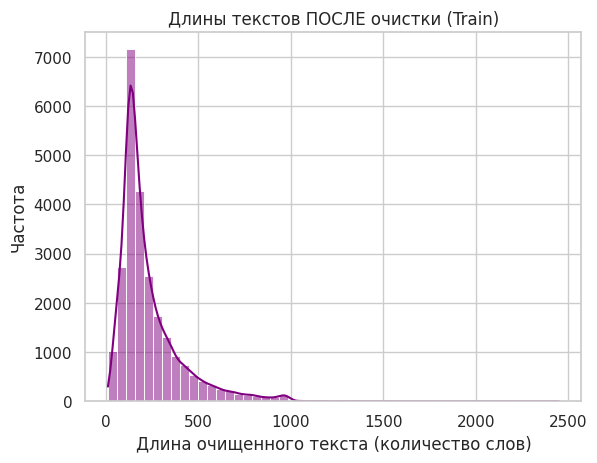

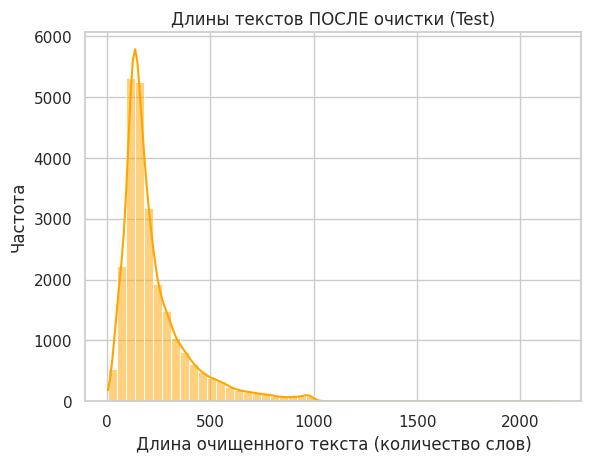

In [ ]:
def plot_cleaned_text_length_distribution(dataset, title, color, bins=50):
    """Определяем функцию для построения распределения длины очищенных текстов в датасете.
       Длины текстов измеряются в количестве слов. Для визуализации используется
       гистограмма с дополнительной линией плотности распределения (kde)."""
    # Вычисляем длины текстов в поле "clean_text", измеренные количеством слов
    lengths = [len(text.split()) for text in dataset["clean_text"]]
    # Строим гистограмму длины текстов с помощью библиотеки seaborn
    sns.histplot(lengths, bins=bins, kde=True, color=color)
    # Указываем заголовок графика
    plt.title(title)
    # Указываем подпись оси X
    plt.xlabel("Длина очищенного текста (количество слов)")
    # Указываем подпись оси Y
    plt.ylabel("Частота")
    # Показываем график
    plt.show()


plot_cleaned_text_length_distribution(train_data,
                                      "Длины текстов ПОСЛЕ очистки (Train)",
                                      color="purple")

plot_cleaned_text_length_distribution(test_data,
                                      "Длины текстов ПОСЛЕ очистки (Test)",
                                      color="orange")

8. Визуализация распределения классов:

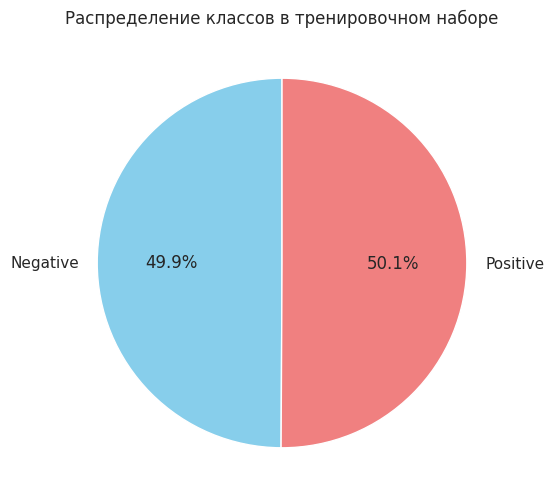

In [ ]:
# Получаем распределение классов в тренировочном наборе
labels, counts = zip(*[(label, count) for label, count in zip(*np.unique(train_data["label"], return_counts=True))])

# Сопоставляем названия классов (0 = Negative, 1 = Positive)
class_names = ['Negative', 'Positive']

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=class_names,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
)

# Добавляем общий заголовок
plt.title("Распределение классов в тренировочном наборе")
plt.show()

- После предобработки, датасет стал чище и понятнее модели. Удалены пустые строки, лишние символы, пропущенные значения и шумы.
- Распределение классов в датасете изначально идеальное, дополнительная обработка не требуется.

# Разделение данных на train/validation

In [ ]:
train_texts = train_data['clean_text']
train_labels = train_data['label']

# Тестовая выборка
test_texts = test_data['clean_text']
test_labels = test_data['label']

# Выделение валидационной выборки
X_train, X_val, y_train, y_val = train_test_split(train_texts,
                                                  train_labels,
                                                  test_size=0.2,
                                                  random_state=42)

print('Размер тренировочной выборки:')
print(len(X_train))
print(len(y_train))

print('Размер валидационной выборки:')
print(len(X_val))
print(len(y_val))

print('Размер тестовой выборки:')
print(len(test_texts))
print(len(test_labels))

Размер тренировочной выборки:
19923
19923
Размер валидационной выборки:
4981
4981
Размер тестовой выборки:
24801
24801


- Выделелена дополнительно валидационная выборка, для лучшего контроля обучения модели.

# Реализация моделей

1. Традиционные модели:

Векторизация:

In [ ]:
# Преобразуем тексты с использованием метода TF-IDF
# Определяем TF-IDF векторизатор с ограничением на максимальное количество признаков
tfidf = TfidfVectorizer(max_features=10000)
# Применяем TF-IDF к обучающему набору данных и сохраняем результат в X_train_tfidf
X_train_tfidf = tfidf.fit_transform(X_train)
# Применяем TF-IDF к валидационному набору данных
X_val_tfidf = tfidf.transform(X_val)
# Применяем TF-IDF к тестовому набору данных
X_test_tfidf = tfidf.transform(test_texts)

- Векторизация данных является важным этапом подготовки данных, особенно для традиционных моделей машинного обучения. Традиционные модели машинного обучения требуют, чтобы входные данные были представлены в числовой форме, поэтому векторизация — это способ преобразовать данные в формат, понятный этим моделям.

Создание моделей Logistic Regression и Random Forest:

In [ ]:
# Создаем словарь моделей для экспериментов
models = {
    # Логистическая регрессия с увеличением числа итераций до 1000
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # Случайный лес с 100 деревьями
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

Обучение моделей:

In [ ]:
for name, model in models.items():
    print(f"\nОбучение {name}...")
    model.fit(X_train_tfidf, y_train)

    # Предсказания на train и validation
    y_train_pred = model.predict(X_train_tfidf)
    y_val_pred = model.predict(X_val_tfidf)

    # Расчет точности
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    print(f"Точность на обучении: {train_acc:.3f}")
    print(f"Точность на валидации: {val_acc:.3f}")


Обучение Logistic Regression...
Точность на обучении: 0.919
Точность на валидации: 0.893

Обучение Random Forest...
Точность на обучении: 1.000
Точность на валидации: 0.841


2. Модель трансформера (DistilBERT):

Подготовка токенизации:

In [ ]:
# Загружаем предобученный токенайзер из модели DistilBERT
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def encode_texts(texts):
    """Определяем функцию для токенизации текстов и их преобразования в тензоры.
       Тексты токенизируются с добавлением padding (дополнение до одинаковой длины),
       усечением (truncation) до 512 токенов и возвращением PyTorch-тензоров."""
    return tokenizer(texts,
                     # Заполнение до одинаковой длины
                     padding=True,
                     # Усечение текстов до максимальной длины
                     truncation=True,
                     # Максимальная длина текстов
                     max_length=512,
                     # Возврат результата в виде PyTorch-тензоров
                     return_tensors='pt')

# Токенизируем и кодируем тренировочные тексты и метки
train_encodings = encode_texts(train_texts)
# Токенизируем и кодируем валидационные тексты и метки
val_encodings = encode_texts(X_val)
# Токенизируем и кодируем тестовые тексты и метки
test_encodings = encode_texts(test_texts)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

- Токенизация — это ключевой этап подготовки текстовых данных для работы с трансформерами. Трансформеры — это модели глубокого обучения, которые принимают на вход последовательности чисел (токенов). Токенизация преобразует текст в такую форму, чтобы модель могла эффективно обучаться и делать предсказания.

Создание датасетов

In [ ]:
class TextDataset(torch.utils.data.Dataset):
    """Определяем класс TextDataset для работы с текстовыми данными в формате PyTorch Dataset.
       Этот класс позволяет обрабатывать токенизированные тексты и их соответствующие метки."""
    def __init__(self, encodings, labels):
        """Конструктор класса, инициализирует тексты (encodings) и метки (labels)."""
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """Возвращает один элемент датасета по индексу.
           Тексты извлекаются из токенизированного словаря, а метки преобразуются в тензоры."""
        # Создаем словарь для одной записи, извлекаем токены
        item = {key: val[idx] for key, val in self.encodings.items()}
        # Добавляем метку для данной записи
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """Возвращает общее количество записей в датасете."""
        return len(self.labels)

# Создаем датасеты для PyTorch с использованием закодированных данных и меток
# Обучающий датасет
train_dataset = TextDataset(train_encodings, train_labels)
# Валидационный датасет
val_dataset = TextDataset(val_encodings, y_val)
# Тестовый датасет
test_dataset = TextDataset(test_encodings, test_labels)

Загрузка модели

In [ ]:
# Загружаем предварительно обученную модель DistilBERT для задачи классификации текста.
# Указываем, что модель должна работать с двумя метками (binary classification).
model = AutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Конфигурация обучения

In [ ]:
# Загружаем библиотеку для расчета метрик (в данном случае Accuracy - точность)
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    """
    Определяем функцию для вычисления метрик оценки модели. Эта функция используется
    во время валидации или тестирования модели в Trainer.
    """
    # Достаём предсказанные логиты и истинные метки
    logits, labels = eval_pred

    # Выбираем индексы с максимальным значением (т.е. предсказанный класс)
    predictions = torch.argmax(torch.tensor(logits), dim=1).numpy()

    # Вычисляем точность
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Настраиваем параметры обучения модели
training_args = TrainingArguments(
    output_dir="./results",            # Путь к директории для хранения результатов (чекпоинты модели).
    eval_strategy="epoch",             # Оценка метрик проводится после каждой эпохи.
    save_strategy="epoch",             # Сохранение модели выполняется после каждой эпохи.
    learning_rate=2e-5,                # Скорость обучения модели.
    per_device_train_batch_size=16,    # Размер батча (batch size) для тренировочного набора.
    per_device_eval_batch_size=16,     # Размер батча для валидационного (оценочного) набора.
    num_train_epochs=3,                # Общее количество эпох для обучения модели.
    weight_decay=0.01,                 # Коэффициент регуляризации для предотвращения переобучения.
    logging_dir="./logs",              # Путь к директории, где будут храниться логи тренировок.
    logging_steps=10,                  # Сколько шагов должно пройти перед записью лога.
    load_best_model_at_end=True,       # Загружать лучшую модель (на основе метрики) после завершения обучения.
    metric_for_best_model="accuracy",  # Используем метрику точности (accuracy) для определения лучшей модели.
    report_to="none",                  # Не отчётируем в сторонние инструменты отслеживания (например, WandB).
)

# Создаем объект класса Trainer для учебного процесса
trainer = Trainer(
    model=model,                       # Модель, которая будет использоваться для обучения.
    args=training_args,                # Параметры обучения, указанные выше.
    train_dataset=train_dataset,       # Датасет для обучения модели.
    eval_dataset=val_dataset,          # Датасет для валидации модели.
    processing_class=tokenizer,        # Токенайзер для обработки текстовых данных.
    compute_metrics=compute_metrics,   # Функция расчета метрик для оценки модели.
)

Тренировка модели

In [ ]:
# Очистка кэша перед обучением
torch.cuda.empty_cache()

# Запускаем обучение модели DistilBERT
trainer.train()

# Сохраняем обученную модель в Google Drive для дальнейшего использования
trainer.save_model('/content/drive/MyDrive/distilbert_imdb')

Epoch,Training Loss,Validation Loss,Accuracy
1,0.182500,0.161081,0.945995
2,0.161400,0.075369,0.976511
3,0.109600,0.051749,0.988356


Визуализация обучения

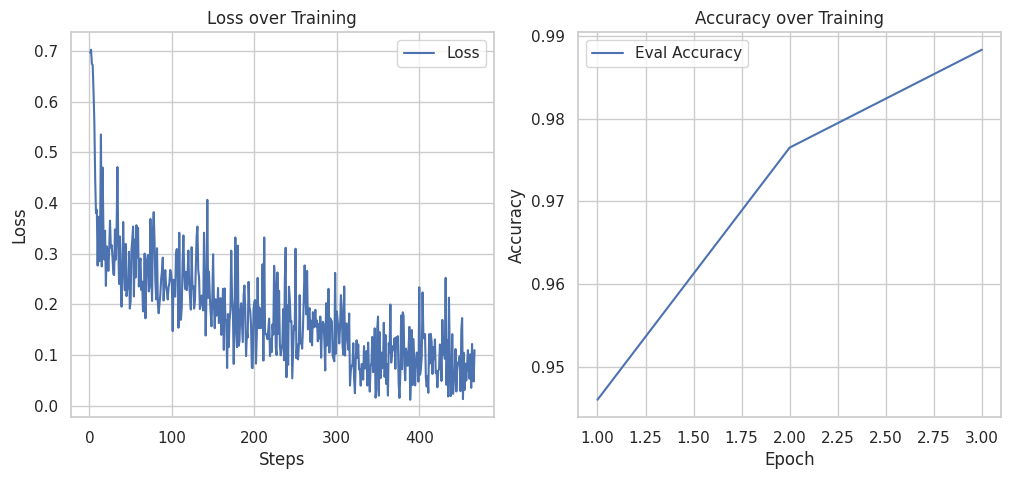

In [ ]:
training_logs = trainer.state.log_history

# Извлечение потерь и точности из логов
losses = [log["loss"] for log in training_logs if "loss" in log and "eval_loss" not in log]
train_accuracies = [log["eval_accuracy"] for log in training_logs if "eval_accuracy" in log]

# Построим графики
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses, label="Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Loss over Training")
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Eval Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Training")
plt.legend()

plt.show()

- во время обучения трансформера выведены графики изменения ошибок и точности, также выводится цифровая оценка работы модели

# Оценка результатов:

Подгрузка предварительно обученной модели:

In [ ]:
# Определяем путь к модели, которую мы обучили ранее
model_path = '/content/drive/MyDrive/distilbert_imdb'

# Загружаем предобученную модель для классификации последовательностей
# с дополнительной возможностью вывода attention-механизмов
model_attention = AutoModelForSequenceClassification.from_pretrained(
    model_path,
    # Выводить внимание (attention) из модели
    output_attentions=True,
    # Задаём реализацию внимания (eager -- это реализация с вычислением на каждом шаге)
    attn_implementation="eager"
)

Определение функции для кэширования результатов предсказания. Используется для исключения постоянного запуска предсказания при сравнении моделей:

In [ ]:
# Глобальная структура для кэширования предсказаний DistilBERT
distilbert_predictions = {}

def cache_transformer_predictions(trainer, test_dataset):
    """
    Кэширует предсказания модели.
    Когда предсказания сохранены, их можно повторно использовать без повторного вычисления.
    """
    # Проверяем, есть ли предсказания модель в кэше
    if "y_pred" not in distilbert_predictions:
        print("Вычисляем предсказания трансформера (занимает время)...")
        # Выполняем предсказания с использованием Trainer
        test_results = trainer.predict(test_dataset)

        # Предicted labels: выбираем индекс с максимальной вероятностью (argmax)
        distilbert_predictions["y_pred"] = np.argmax(test_results.predictions,
                                                     axis=1)

        # Вероятности: применяем softmax для получения вероятностного распределения
        distilbert_predictions["y_prob"] = torch.softmax(
            torch.tensor(test_results.predictions), axis=1
        ).numpy()
        print("Предсказания сохранены в кэш.")
    else:
        print("Предсказания уже сохранены. Используем кэш.")

Определение функции для визуализации внимания

In [ ]:
def visualize_attention(sentence, model, tokenizer, layer=0, head=0):
    """
    Визуализация карты внимания (attention) для заданного предложения (sentence).
    """
    # Токенизируем предложение и преобразуем в тензор
    inputs = tokenizer(sentence, return_tensors="pt")

    # Пропускаем токены через модель для получения результата и attention
    outputs = model(**inputs)

    # Получаем карты внимания (attentions)
    attentions = outputs.attentions

    # Берём attention для указанного слоя и головы, извлекаем в виде numpy-матрицы
    attention_map = attentions[layer][0, head].detach().numpy()

    # Преобразуем индексы токенов обратно в символы (читаемый текст)
    tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

    # Визуализируем attention в виде тепловой карты
    plt.figure(figsize=(10, 10))
    plt.imshow(attention_map, cmap='viridis')
    plt.colorbar()

    # Устанавливаем подписи (для осей X и Y) токенов
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.yticks(range(len(tokens)), tokens)
    plt.title(f'Attention Map - Layer {layer + 1}, Head {head + 1}')
    plt.show()

Определение функции для оценки моделей:

In [ ]:
def evaluate_model(model, X_test, y_test, model_name, is_transformer=False, transformer_pred=None):
    """
    Функция оценки модели, основанная на различных метриках классификации (Precision, Recall, F1, Accuracy).
    """
    if is_transformer:
        # Для трансформеров проверяем, были ли переданы предсказания
        assert transformer_pred is not None, "Передайте transformer_pred для трансформера!"
        y_pred = transformer_pred
    else:
        # Выполняем предсказания с использованием обыкновенной модели (например, SVM)
        y_pred = model.predict(X_test)

    # Печатаем отчет о классификации
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Визуализируем матрицу ошибок (confusion matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Возвращаем метрики классификации
    return {
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    }

Определение функции для визуализации ROC-кривых:

In [ ]:
def plot_roc_curves(models, X_test, y_test, trainer=None, test_dataset=None):
    """
    Построение ROC-кривых (Receiver Operating Characteristic) для классических моделей и трансформеров.
    """
    plt.figure(figsize=(8, 6))

    # Построение ROC-кривой для каждой классической модели
    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
        fpr, tpr, _ = roc_curve(y_test, y_prob)    # Расчёт FPR, TPR
        roc_auc = auc(fpr, tpr)                    # AUC (площадь под кривой)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

    # Построение ROC-кривой для трансформеров
    if trainer:
        y_prob = distilbert_predictions["y_prob"][:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)    # Для трансформеров тоже рассчитываем FPR, TPR
        roc_auc = auc(fpr, tpr)                    # AUC для DistilBERT
        plt.plot(fpr, tpr, label=f'DistilBERT (AUC = {roc_auc:.3f})', linestyle='--')

    # Диагональная линия "случайного угадывания"
    plt.plot([0, 1], [0, 1], 'k--')

    plt.title('ROC curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

Определение функции для анализа ошибок моделей:

In [ ]:
def analyze_prediction_errors(models, X_test, y_test, test_texts, trainer=None, test_dataset=None):
    """
    Анализ ошибок моделей на тестовом наборе данных.
    """
    # Предсказания для трансформеров (используем кэш)
    test_pred = None
    if trainer:
        cache_transformer_predictions(trainer, test_dataset)
        test_pred = distilbert_predictions["y_pred"]

    @interact
    def show_errors(model=list(models.keys()) + ['DistilBERT']):
        if model == 'DistilBERT' and test_pred is not None:
            preds = test_pred
        else:
            preds = models[model].predict(X_test)

        # Находим индексы ошибок
        errors = np.where(preds != y_test)[0]

        # Выводим первые 5 ошибок
        for idx in errors[:5]:
            print(f"Ошибка {idx}:")
            print(f"Текст: {test_texts[idx][:200]}...")  # Ограничиваем длину текста для удобства
            print(f"Предсказание: {preds[idx]}, Истинное: {y_test[idx]}\n")

Определение функции для сравнения моделей:

In [ ]:
def compare_models(models, X_test, y_test, trainer=None, test_dataset=None):
    """
    Сравнение производительности моделей с использованием метрик (F1, Recall, Precision, Accuracy).
    """
    results = []

    # Подготавливаем предсказания для трансформера (из кэша)
    transformer_pred = None
    if trainer:
        cache_transformer_predictions(trainer, test_dataset)
        transformer_pred = distilbert_predictions["y_pred"]

    # Оцениваем классические модели
    for name, model in models.items():
        metrics = evaluate_model(model, X_test, y_test, name)
        results.append({'Model': name, **metrics})

    # Оцениваем трансформер
    if trainer:
        metrics = evaluate_model(
            trainer, test_dataset, y_test, 'DistilBERT',
            is_transformer=True, transformer_pred=transformer_pred
        )
        results.append({'Model': 'DistilBERT', **metrics})

    # Создаём DataFrame с результатами
    results_df = pd.DataFrame(results).round(3)

    # Отображение таблицы с подсветкой
    display(results_df.style.background_gradient(cmap='viridis',
                                                 subset=['Accuracy',
                                                         'F1-Score']))

Определение функции для демонстрации работы моделей на вводимых данных:

In [ ]:
def predict_on_user_input(models, tokenizer, transformer_model, text_vectorizer=None):
    """
    Функция для получения предсказаний на пользовательском тексте, используя классические модели и трансформеры.
    """
    @interact(model=list(models.keys()) + ['DistilBERT'], text="Enter a text for sentiment analysis")
    def make_prediction(model, text):
        if model == 'DistilBERT':
            # Транcформеры: токенизация и предсказание
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
            outputs = transformer_model(**inputs)
            y_pred = torch.argmax(outputs.logits, axis=1).item()
        else:
            # Классические модели: преобразование текста через векторизатор
            if text_vectorizer is None:
                raise ValueError("Необходимо передать text_vectorizer для предобработки текста для классических моделей.")
            text_features = text_vectorizer.transform([text])
            y_pred = models[model].predict(text_features)[0]

        # Преобразование результата в читаемый формат
        sentiment = 'Positive' if y_pred == 1 else 'Negative'
        print(f"\nТекст: {text}\nМодель: {model}\nПредсказание: {sentiment}")

1. Визуализация карты внимания (attention) для DistilBERT

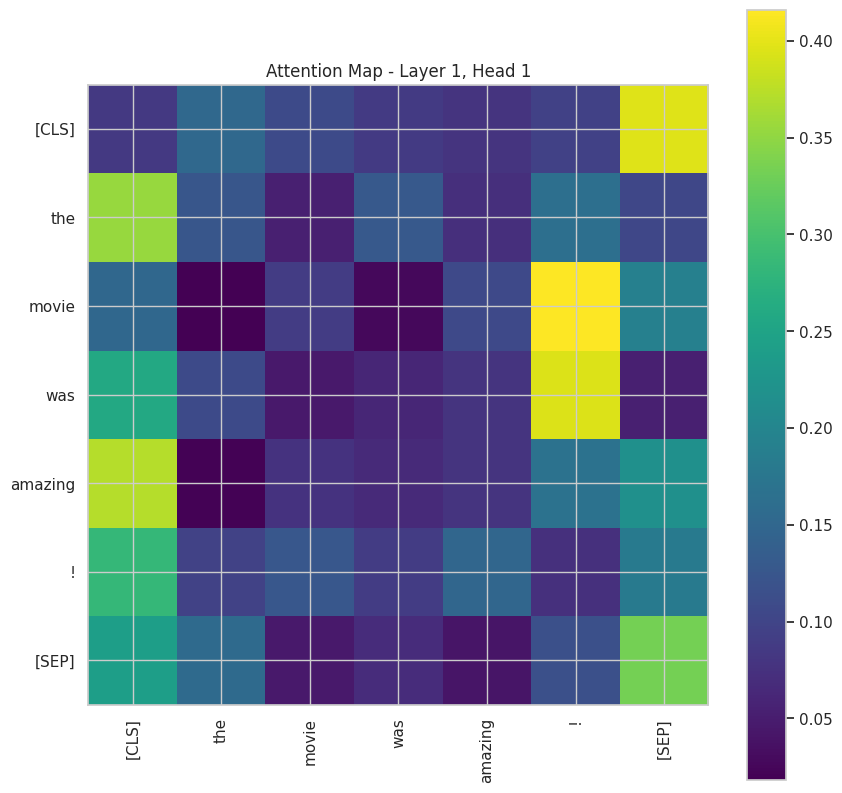

In [ ]:
sentence = "The movie was amazing!"
visualize_attention(
    sentence,         # Входное предложение, для которого визуализируется внимание.
    model_attention,  # Обученная модель DistilBERT с поддержкой внимания.
    tokenizer         # Токенайзер для обработки текста.
)

2. Сравнение моделей по метрикам классификации

- DistilBERT показывает лучший результат, Random Forest - худший.

Предсказания уже сохранены. Используем кэш.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12361
    Positive       0.88      0.89      0.88     12440

    accuracy                           0.88     24801
   macro avg       0.88      0.88      0.88     24801
weighted avg       0.88      0.88      0.88     24801



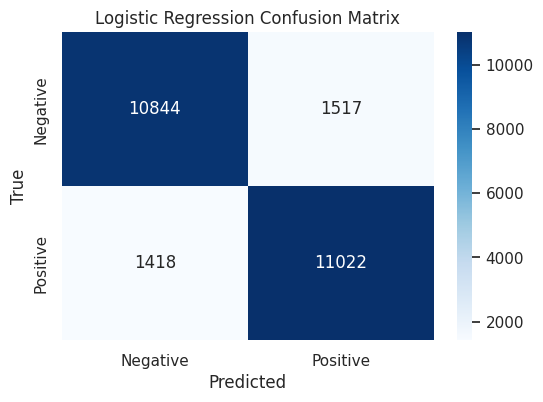


Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.84     12361
    Positive       0.85      0.82      0.83     12440

    accuracy                           0.83     24801
   macro avg       0.83      0.83      0.83     24801
weighted avg       0.83      0.83      0.83     24801



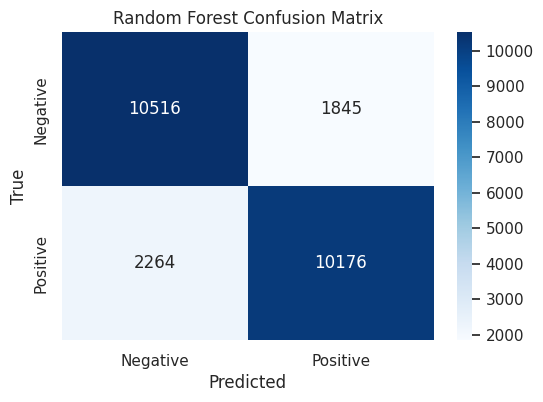


DistilBERT Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.93      0.93     12361
    Positive       0.93      0.92      0.93     12440

    accuracy                           0.93     24801
   macro avg       0.93      0.93      0.93     24801
weighted avg       0.93      0.93      0.93     24801



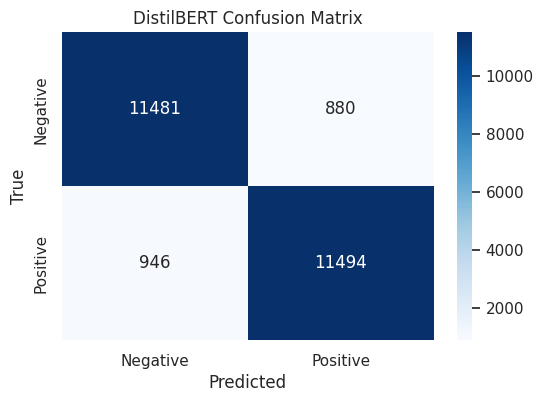

,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.879000,0.886000,0.883000,0.882000
1,Random Forest,0.847000,0.818000,0.832000,0.834000
2,DistilBERT,0.929000,0.924000,0.926000,0.926000


In [ ]:
compare_models(
    models,            # Словарь моделей (Logistic Regression, Random Forest).
    X_test_tfidf,      # Тестовые данные в TF-IDF формате (для классических моделей).
    test_labels,       # Истинные метки классов для тестового набора.
    trainer,           # Trainer объекта (обученной модели DistilBERT).
    test_dataset       # Тестовый набор данных для трансформера.
)

3. Анализ ошибок предсказаний моделей

- При запущенном коде, анализ ошибок можно проссмотреть интерактивно, выбирая модель из списка. При остановленном, к сожалению, проссмотр невозможен. Но приложены скриншоты ошибок.
- Видно, что трансформер делает меньшее количество ошибок, а вот остальные модели демонстрируют, практически, одинаковые ошибки.

In [ ]:
analyze_prediction_errors(
    models,            # Словарь обученных моделей.
    X_test_tfidf,      # Тестовые данные в TF-IDF формате (для классических моделей).
    test_labels,       # Истинные метки классов для тестового набора.
    test_texts,        # Список текстов из тестового набора данных.
    trainer,           # Trainer объекта (обученной модели DistilBERT).
    test_dataset       # Тестовый набор данных для трансформера.
)

Предсказания уже сохранены. Используем кэш.


interactive(children=(Dropdown(description='model', options=('Logistic Regression', 'Random Forest', 'DistilBE…

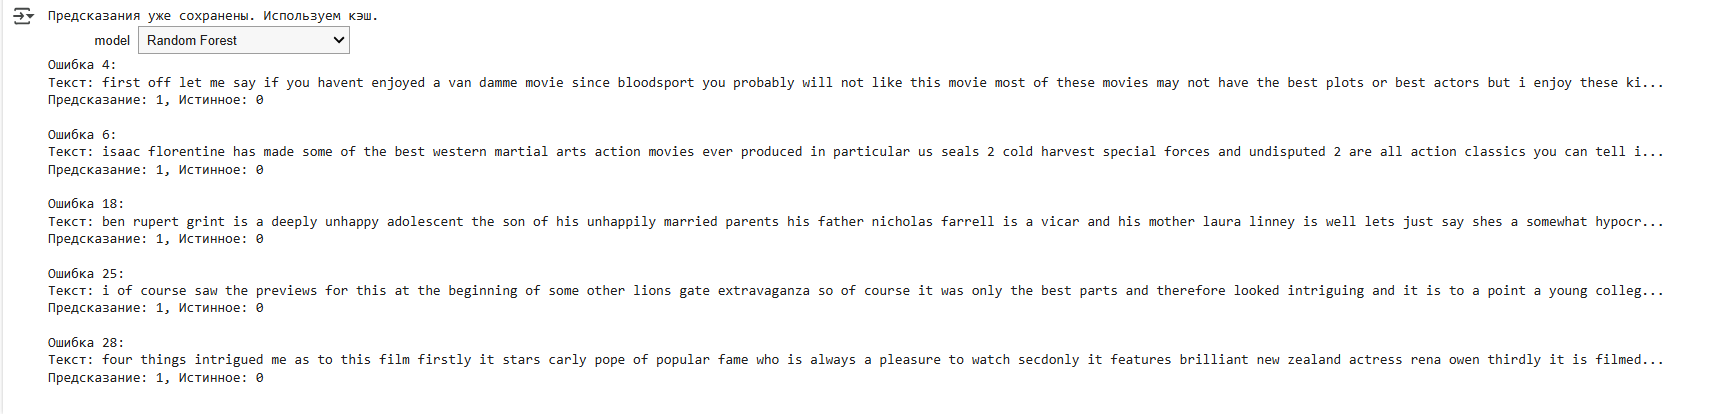

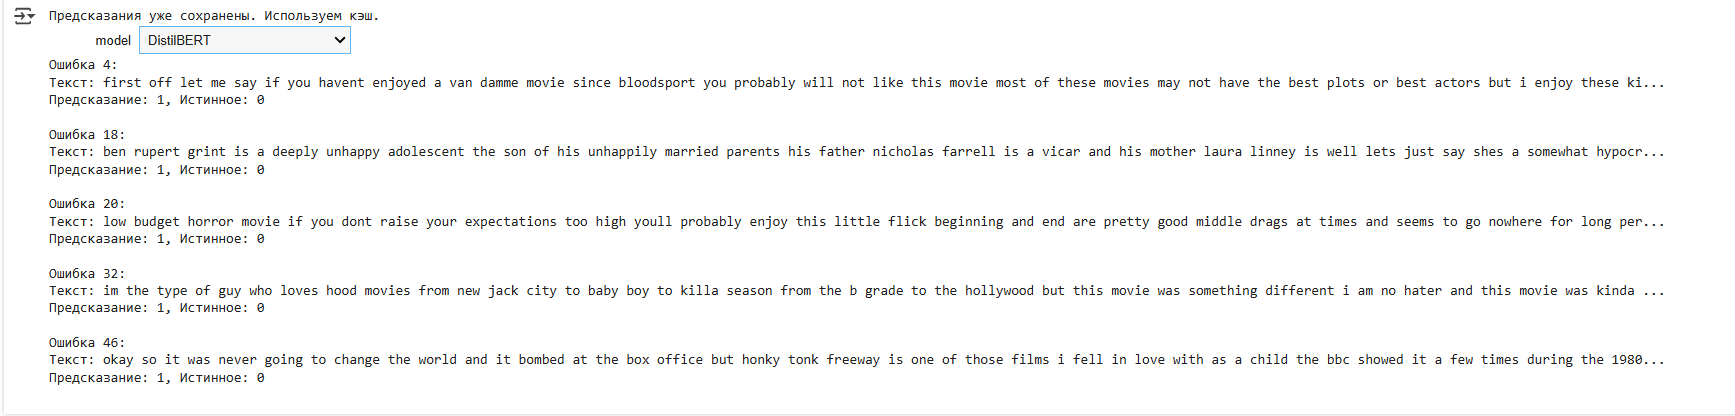

4. Построение ROC-кривых для классических моделей и DistilBERT

- DistilBERT показывает лучший результат, Random Forest - худший.

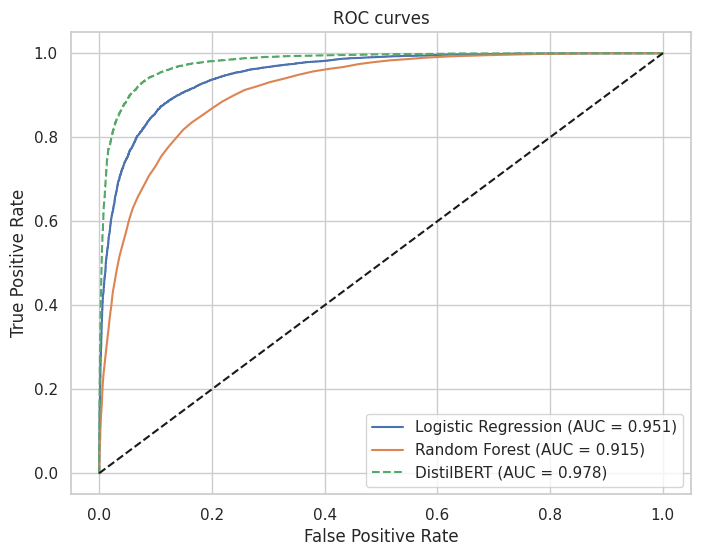

In [ ]:
plot_roc_curves(
    models,            # Словарь обученных классических моделей.
    X_test_tfidf,      # Тестовые данные в TF-IDF формате (для классических моделей).
    test_labels,       # Истинные метки классов для тестового набора.
    trainer,           # Trainer объекта (обученной модели DistilBERT).
    test_dataset       # Тестовый набор данных для трансформера.
)

5. Предсказание модели на пользовательском вводе

- При запущенном коде, предсказание модели на пользовательском вводе, можно проссмотреть интерактивно, выбирая модель из списка. При остановленном, к сожалению, проссмотр невозможен. Но приложены скриншоты работы моделей.
- Все модели справились одинаково правильно.

In [ ]:
predict_on_user_input(
    models=models,                      # Словарь моделей (Logistic Regression, Random Forest).
    tokenizer=tokenizer,                # Токенайзер, связанный с трансформерной моделью.
    transformer_model=model_attention,  # Модель DistilBERT для предсказания.
    text_vectorizer=tfidf               # Векторизатор TF-IDF для классических моделей.
)

interactive(children=(Dropdown(description='model', options=('Logistic Regression', 'Random Forest', 'DistilBE…

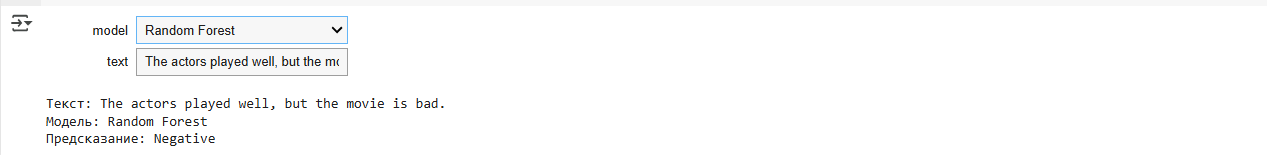

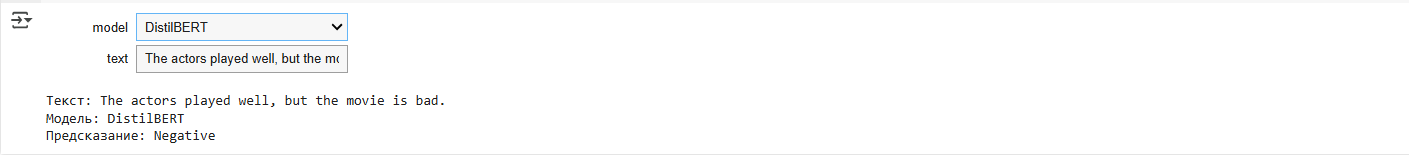

**На основе результатов сравнения моделей, можно сделать следующие выводы о трех моделях: Logistic Regression, Random Forest и DistilBERT:**

**1. Подведенные итоги:**
- Модель DistilBERT продемонстрировала наилучшие результаты по всем показателям (Precision, Recall, F1-score, Accuracy).
- Logistic Regression находится на втором месте.
- Random Forest занимает последнее место, уступая первой модели по всем метрикам.

**2. Различия по отдельным метрикам:**

**Precision (Точность):**
- DistilBERT: 0.929
- Logistic Regression: 0.879
- Random Forest: 0.847 Вывод: DistilBERT на 0.05 опережает Logistic Regression и на 0.08 опережает Random Forest.

DistilBERT точнее в прогнозировании положительных и отрицательных классов.

**Recall (Полнота):**
- DistilBERT: 0.924
- Logistic Regression: 0.886
- Random Forest: 0.818 Вывод: DistilBERT также доминирует в отношении полноты.

DistilBERT лучше других моделей справляется с обнаружением всех релевантных случаев.

**F1-score:**
- DistilBERT: 0.926
- Logistic Regression: 0.883
- Random Forest: 0.832

DistilBERT обладает лучшим балансом между precision и recall, показывая значительно более высокое значение F1-score.

**Accuracy (Точность на всех данных):**

- DistilBERT: 0.926
- Logistic Regression: 0.882
- Random Forest: 0.834

DistilBERT показывает максимальную точность на уровне 92.6%, тогда как Logistic Regression — 88.2%, а Random Forest отстает с результатом 83.4%.

**3. Преимущества и Недостатки каждой модели:**
- **Logistic Regression:**
  - Преимущества: Простота, интерпретируемость модели, быстрые вычисления.
  - Недостатки: Сравнительно низкие значения метрик (0.882 точности), что ограничивает применение модели в высокочувствительных задачах.
- **Random Forest:**
  - Преимущества: Хорошо справляется с неоднородными данными и может захватывать нелинейные зависимости.
  - Недостатки: Хуже справляется с задачей, чем Logistic Regression и DistilBERT. Особенно страдает полнота (Recall = 0.818), что может быть проблемой в ситуациях, где необходимы максимально полные результаты.
- **DistilBERT:**
  - Преимущества: Лучшие метрики среди всех моделей, превосходная способность обрабатывать текстовые данные благодаря архитектуре трансформеров.
  - Недостатки: Высокие вычислительные затраты и сложность тренировки/интеграции модели по сравнению с Logistic Regression и Random Forest.

**4. Рекомендации по выбору модели:**

**Если основной приоритет — качество и производительность:**

DistilBERT — безусловный лидер среди всех моделей. Он обеспечивает наивысшую точность, полноту и F1-score, что делает его лучшим выбором для задач, требующих высокой производительности.

**Если важна интерпретируемость и вычислительная простота:**

Logistic Regression — это модель выбора. Она обеспечивает приемлемую производительность с гораздо меньшими вычислительными затратами, хотя и уступает DistilBERT в точности.

**Если требуется работа с большими объемами данных или сильной разнородностью:**

Random Forest может использоваться, хотя результаты хуже, чем у Logistic Regression и DistilBERT. Возможно, модель нуждается в тщательной настройке гиперпараметров для улучшения метрик.

**Итог:**

Лидирующая модель: DistilBERT благодаря высочайшим значениям Precision, Recall, F1-score и Accuracy.

Достаточная по показателям альтернатива: Logistic Regression для случаев, когда важны интерпретируемость и скорость работы.

На будущее: Использовать Random Forest только для задач, где важна интерпретируемость на сложных и неоднородных данных, а высокие значения метрик имеют меньший приоритет.

**Практическая значимость:**

Данное исследование показывает, что современные трансформеры открывают новые горизонты в классификации текста и аналитике данных. В сфере автоматизации обработки текстовых данных результаты работы могут быть полезны для разработки сервисов анализа тональности текстов, систем рекомендаций и интеллектуальных чат-ботов.

**Направления для дальнейших исследований:**

- Исследование влияния предобработки текста на производительность трансформеров.
- Адаптация моделей к многоязычным данным.
- Оптимизация затрат памяти и скорости работы трансформерных моделей для их внедрения в мобильные и встраиваемые системы.
- Сравнение DistilBERT с другими трансформерами следующего поколения, такими как DeBERTa или GPT-4.